In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/saltandpepper_Screen Shot 2018-06-12 at 8.53.54 PM.png
/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/b_r063.png
/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/b_r347.png
/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/Screen Shot 2018-06-12 at 9.27.26 PM.png
/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/rotated_by_45_Screen Shot 2018-06-12 at 8.58.13 PM.png
/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/rotated_by_75_Screen Shot 2018-06-12 at 8.47.41 PM.png
/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/rotated_by_75_Screen Shot 2018-06-12 at 8.56.30 PM.png
/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/b_r018.png
/kaggle/input/fresh-and-stale-classification/dataset/Test/rottenbanana/saltandpepper_Screen Shot 2018-06-12 at 9.11.17 PM.png
/kaggle/inpu

# Getting our FASTAI Ready 

In [2]:
!pip install --upgrade fastai

# Getting all the Libaries Ready

In [10]:
from fastai.vision.all import *
from pathlib import Path
import matplotlib.pyplot as plt

# Getting our train data ready

In [5]:
#path to our dataset
data_path = Path('/kaggle/input/fresh-and-stale-classification/dataset')

#checking the folder structure
print(data_path.ls())

#cheking our traning and validation data
print((data_path/'Train').ls())
print((data_path/'Test').ls())

[Path('/kaggle/input/fresh-and-stale-classification/dataset/Test'), Path('/kaggle/input/fresh-and-stale-classification/dataset/Train')]
[Path('/kaggle/input/fresh-and-stale-classification/dataset/Train/rottenbanana'), Path('/kaggle/input/fresh-and-stale-classification/dataset/Train/freshpotato'), Path('/kaggle/input/fresh-and-stale-classification/dataset/Train/freshokra'), Path('/kaggle/input/fresh-and-stale-classification/dataset/Train/rottentomato'), Path('/kaggle/input/fresh-and-stale-classification/dataset/Train/rottenokra'), Path('/kaggle/input/fresh-and-stale-classification/dataset/Train/freshoranges'), Path('/kaggle/input/fresh-and-stale-classification/dataset/Train/rottenoranges'), Path('/kaggle/input/fresh-and-stale-classification/dataset/Train/freshcucumber'), Path('/kaggle/input/fresh-and-stale-classification/dataset/Train/rottencapsicum'), Path('/kaggle/input/fresh-and-stale-classification/dataset/Train/freshtomato'), Path('/kaggle/input/fresh-and-stale-classification/datas

# creating datset/dataloader with FASTAI

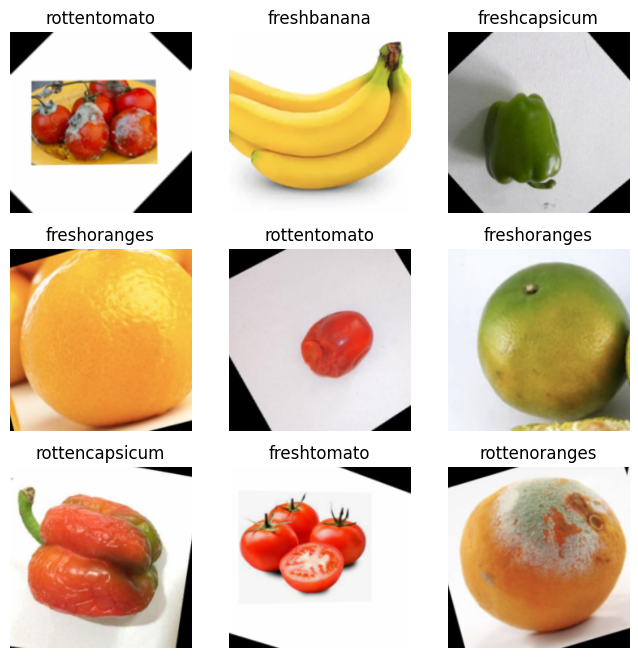

In [6]:
#creating the dataloader with fastAI
data = ImageDataLoaders.from_folder(
    data_path/'Train',#using only the train folder
    valid_pct=0.2, #20% of the train data now is validation data
    item_tfms=Resize(224), #Resizing the images to 224*224
    batch_tfms=aug_transforms(mult=0.2)
)

#showing the batch of images
data.show_batch(max_n=9, figsize=(8, 8))

# Creating our Model and Traning the Model

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

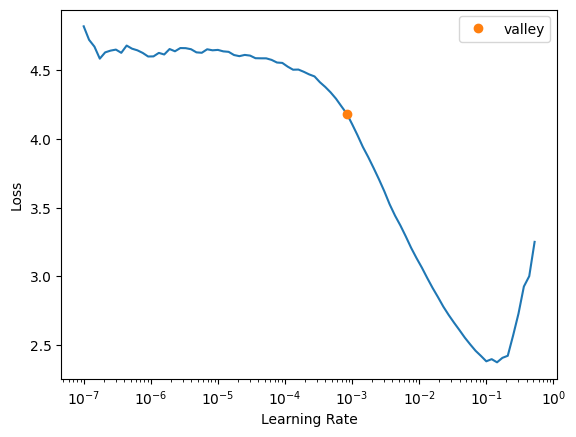

In [7]:
#creating the lernaer and train
learn = cnn_learner(data, resnet34, metrics=accuracy, path=Path('/kaggle/working'))

#finfing the optimal rate
learn.lr_find()

#train the model
learn.fine_tune(4)

# Model Evualtion

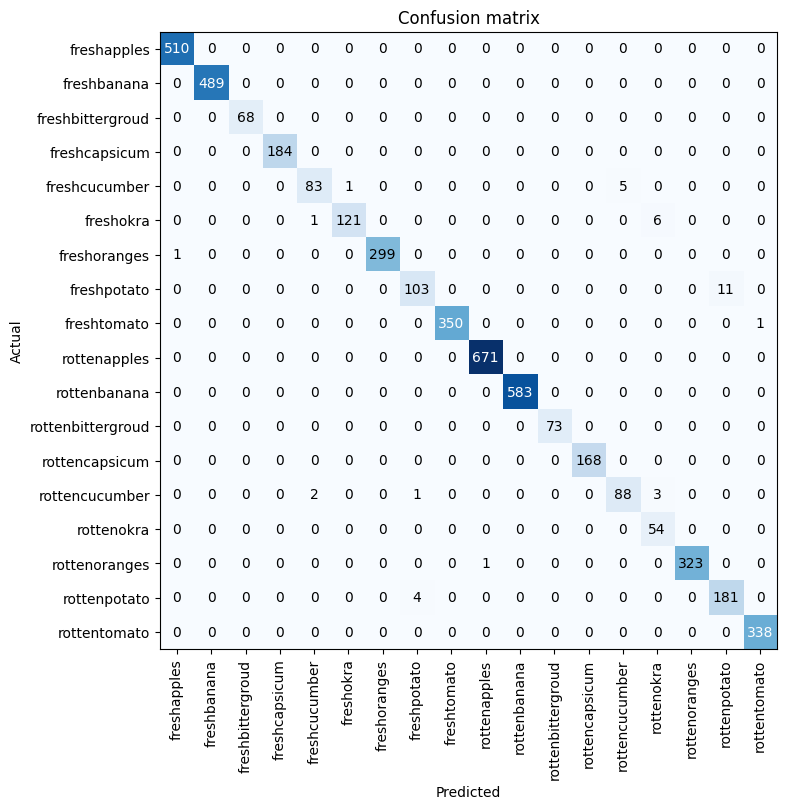

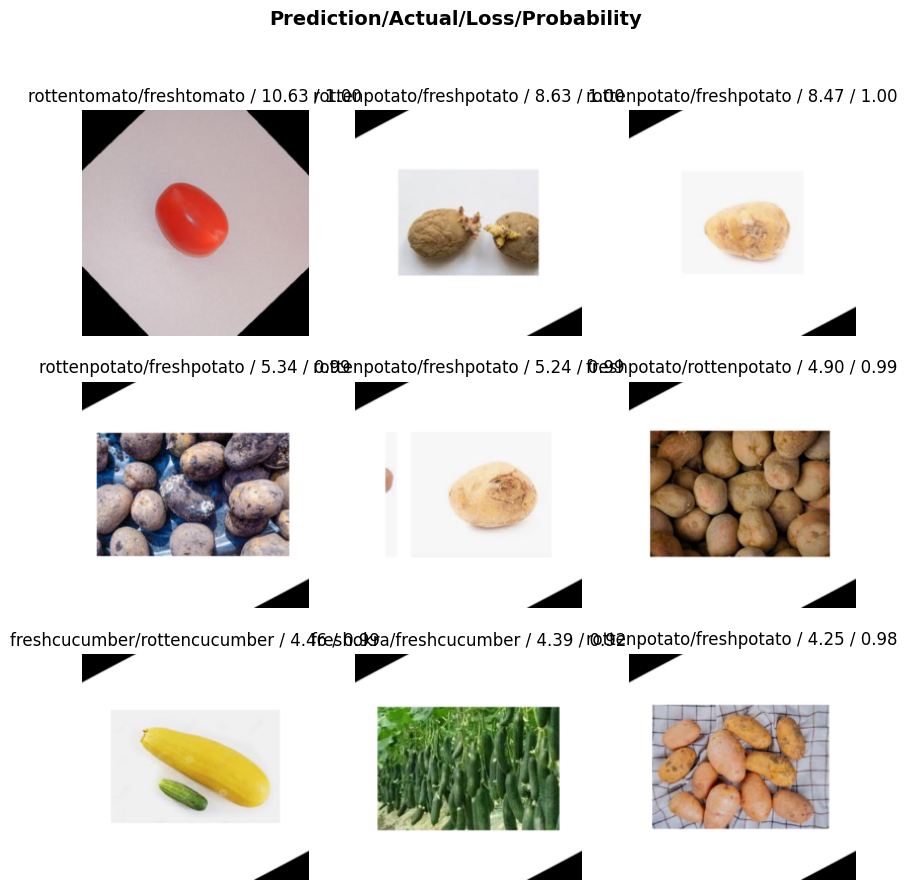

In [12]:
#evulating the model on validation set
intrep = ClassificationInterpretation.from_learner(learn)
intrep.plot_confusion_matrix(figsize=(8, 8))
intrep.plot_top_losses(9, figsize=(10, 10))

# Getting the Test datloader ready

In [15]:
#define the path to the test data
test_path = data_path/'Test'

#get all the image file path in the directory
test_files = get_image_files(test_path)

#adding the test data
data = data.new(
    test_dl = data.test_dl(test_files)
)

#checking the test dataloader
data.test_dl.show_batch(max_n=9, fig_size=(8, 8))

AttributeError: test_dl

In [16]:
# Define the test data path
test_path = Path('/kaggle/input/fresh-and-stale-classification/dataset/Test/')

# Add test data to the DataLoaders
dls = dls.test_dl(get_image_files(test_path))


NameError: name 'dls' is not defined

In [20]:
path_to_train = Path('/kaggle/input/fresh-and-stale-classification/dataset/Train/')

In [21]:
# Load the data
dls = data.dataloaders(path_to_train, bs=64)


TypeError: FilteredBase.dataloaders() got multiple values for argument 'bs'

In [ ]:
#getting predictions for test set
test_preds, _ = learn.get_preds(dl = data.test_dl)

# Model Saving

In [ ]:
# Load the data
dls = data.dataloaders(path_to_train, bs=64)

In [14]:
learn.export('/kaggle/working/fruit_classifier.pkl')

In [ ]:
#testing the model
learn_inf = load_learner('/kaggle/working/fruit_classifier.pkl')



In [ ]:
img = PILImage.create('/kaggle/input/fruits/test/fresh_apple/1.jpg')
pred, pred_idx, probs = learn_inf.predict(img)
print(f"Prediction: {pred}, Probability: {probs[pred_idx]:.4f}")
